___

<a href='https://sites.google.com/fat.uerj.br/livia'><img src="../figures/capa2.png"/></a>
___

# $K$-vizinhos mais próximos (KNN)

## Introdução

$K$-vizinhos mais próximos (KNN) é um tipo de algoritmo de aprendizado supervisionado usado para regressão e classificação. O KNN tenta prever a classe correta para os dados de teste calculando a distância entre os dados de teste e todos os pontos de treinamento. Em seguida, selecione o número $K$ de pontos que está mais próximo dos dados de teste. O algoritmo KNN calcula a probabilidade dos dados de teste pertencentes às classes de dados de treinamento `K` e a classe contém a maior probabilidade de ser selecionada. No caso de regressão, o valor é a média dos `K` pontos de treinamento selecionados.

Suponha que temos uma imagem de uma criatura que se parece com um gato e um cachorro, mas queremos saber se é um gato ou um cachorro. Então, para essa identificação, podemos usar o algoritmo KNN, pois ele trabalha com uma medida de similaridade. Nosso modelo KNN encontrará os recursos semelhantes do novo conjunto de dados para as imagens de cães e gatos e, com base nos recursos mais semelhantes, o colocará na categoria de gato ou cachorro.

Dado um inteiro positivo $K$ e uma observação de teste $x_0$ , o classificador KNN primeiro identifica os vizinhos $K$ pontos nos dados de treinamento que estão mais próximos de $x_0$, representados por $\mathcal N_0$ .
Em seguida, estima a probabilidade condicional para a classe $j$ como a fração de pontos em $\mathcal N_0$ cujos valores de resposta são iguais a $j$:

$$
\text{Pr}(Y=j\mid x_0) = \frac{1}{K}\sum_{i\in\mathcal N_0} I(y_i=j)
$$

Finalmente, KNN classifica a observação de teste $x_0$ para a classe com o maior
probabilidade.

<figure>
<img src="../figures/13-knn.png" style="width:80%">
</figure>

A figura acima fornece um exemplo ilustrativo da abordagem KNN. No painel esquerdo, plotamos um pequeno conjunto de dados de treinamento que consiste em seis observações azuis e seis laranjas. Nosso objetivo é fazer uma previsão para o ponto marcado pela cruz preta. Suponha que escolhemos $K = 3$. Então KNN identificará primeiro as três observações que estão mais próximas do cruzamento.

Este vizinho é mostrado como um círculo. Consiste em dois pontos azuis e um ponto laranja, resultando em probabilidades estimadas de $2/3$ para a classe azul e $1/3$ para a classe laranja. Portanto, KNN preverá que a cruz preta pertence à classe azul. No painel direito da figura, aplicamos a abordagem KNN com $K = 3$ em todos os valores possíveis para $X_1$ e $X_2$ e desenhamos o limite de decisão KNN correspondente.

Apesar do fato de ser uma abordagem muito simples, KNN muitas vezes pode produzir classificadores que são surpreendentemente próximos do classificador de Bayes ótimo.

A figura abaixo exibe o limite de decisão KNN, usando $K = 10$, quando aplicado ao maior conjunto de dados. Observe que, embora a verdadeira distribuição não seja conhecida pelo classificador KNN, o limite de decisão é muito próximo ao do classificador de Bayes.

<figure>
<img src="../figures/13-knn10.png" style="width:70%">
<figcaption align = "center"> 

Uma comparação dos limites de decisão KNN (preto sólido curvas) obtidas usando $K = 1$ e $K = 100$. Com $K = 1$, o limite de decisão é excessivamente flexível, enquanto com $K = 100$ não é suficientemente flexível. O limite de decisão de Bayes é mostrado como uma linha tracejada roxa. </figcaption>
</figure>

A escolha de $K$ tem um efeito drástico no classificador KNN obtido. A figura abaixo exibe dois ajustes KNN para os dados, usando $K = 1$ e $K = 100$. Quando $K = 1$, o limite de decisão é excessivamente flexível e encontra padrões nos dados que não correspondem ao limite de decisão do Bayes. Isso corresponde a um classificador com baixo viés, mas variância muito alta. À medida que $K$ cresce, o método se torna menos flexível e produz um limite de decisão próximo do linear. Isso corresponde a um classificador de baixa variância, mas de alto viés. Neste conjunto de dados simulado, nem $K = 1$ nem $K = 100$ fornecem boas previsões: eles têm taxas de erro de teste de $0,1695$ e $0,1925$, respectivamente.


<figure>
<img src="../figures/13-knn100.png" style="width:80%">
<figcaption align = "center"> Uma comparação dos limites de decisão KNN (curvas pretas sólidas) obtidas usando K = 1 e K = 100 nos dados da Figura 2.13. Com K = 1, o limite de decisão é excessivamente flexível, enquanto com K = 100 não é suficientemente flexível. O limite de decisão de Bayes é mostrado como uma linha tracejada roxa. </figcaption>
</figure>


Assim como na regressão, não há uma forte relação entre a taxa de erro de treinamento e a taxa de erro de teste. Com $K = 1$, a taxa de erro de treinamento KNN é $0$, mas a taxa de erro de teste pode ser bastante alta. Em geral, à medida que usamos métodos de classificação mais flexíveis, a taxa de erro de treinamento diminuirá, mas a taxa de erro de teste pode não. Na Figura abaixo, plotamos o teste KNN e os erros de treinamento em função de $1/K$. À medida que $1/K$ aumenta, o método se torna mais flexível. Como na regressão, a taxa de erro de treinamento diminui consistentemente à medida que a flexibilidade aumenta. No entanto,
o erro de teste exibe uma característica em forma de U, diminuindo no início (com um mínimo em aproximadamente $K = 10$) antes de aumentar novamente quando o método se torna excessivamente flexível e superajustado.

<figure>
<img src="../figures/13-knn_erro.png" style="width:80%">
<figcaption align = "center"> A taxa de erro de treinamento KNN (azul, 200 observações) e a taxa de erro de teste (laranja, 5.000 observações) nos dados, conforme o nível de flexibilidade (avaliado usando $1/K$ na escala logarítmica) aumenta, ou equivalentemente conforme o número de vizinhos $K$ diminui. A linha tracejada preta indica a taxa de erro de Bayes. O salto das curvas é devido ao pequeno tamanho do conjunto de dados de treinamento. </figcaption>
</figure>

## A Implementação do KNN no Python

Você recebeu um conjunto de dados classificados de uma empresa! Eles ocultaram os nomes das colunas de recursos, mas forneceram os dados e as classes de destino.

Tentaremos usar o KNN para criar um modelo que prevê diretamente uma classe para um novo ponto de dados com base nos recursos.

Vamos agarrá-lo e usá-lo!

### Importando as bibliotecas



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Obtendo os dados

Coloca index_col=0 para usar a primeira coluna como indice.

In [3]:
data_folder = '../data/'
df = pd.read_csv(data_folder + "Classified Data.csv",index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Padronizar as Variáveis

Como o classificador KNN prevê a classe de uma determinada observação de teste identificando as observações mais próximas a ela, a escala das variáveis é importante. Quaisquer variáveis que estejam em grande escala terão um efeito muito maior na distância entre as observações e, portanto, no classificador KNN, do que variáveis em pequena escala.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

### Usando KNN

Lembre-se de que estamos tentando criar um modelo para prever se alguém será TARGET CLASS ou não. Começaremos com $k=1$.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

### Predições e Avaliações


Vamos avaliar nosso modelo!

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[140  18]
 [  8 134]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       158
           1       0.88      0.94      0.91       142

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



### Escolhendo um valor K

Vamos avançar e usar o metodo Elbow para achar um bom valor $K$:

In [19]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

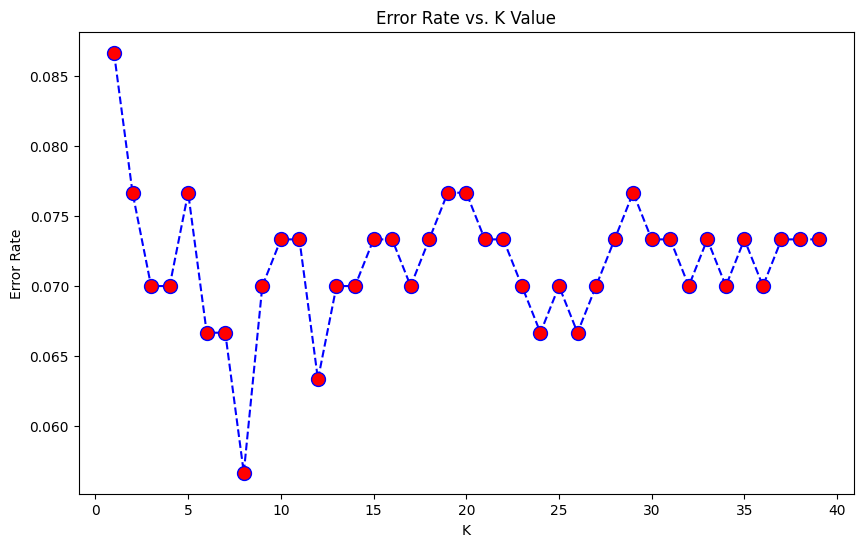

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Aqui podemos ver que depois de $K > 23$ a taxa de erro tende a pairar em torno de 0,06-0,05. Vamos treinar novamente o modelo com isso e verificar o relatório de classificação!

In [21]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[140  18]
 [  8 134]]


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       158
           1       0.88      0.94      0.91       142

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



In [22]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[141  17]
 [  4 138]]


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       158
           1       0.89      0.97      0.93       142

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

